<a href="https://colab.research.google.com/github/gururaja-ai/Data_Science/blob/Natural_Language_Processing/2_Basics_of_Natural_Language_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# spaCy Basics

**spaCy** (https://spacy.io/) is an open-source Python library that parses and "understands" large volumes of text. Separate models are available that cater to specific languages (English, French, German, etc.).

In this section we'll install and setup spaCy to work with Python, and then introduce some concepts related to Natural Language Processing.

# Installation and Setup

Installation is a two-step process. First, install spaCy using either conda or pip. Next, download the specific model you want, based on language.<br> For more info visit https://spacy.io/usage/

### 1. From the command line or terminal:
> `conda install -c conda-forge spacy`
> <br>*or*<br>
> `pip install -U spacy`

> ### Alternatively you can create a virtual environment:
> `conda create -n spacyenv python=3 spacy=2`

### 2. Next, also from the command line (you must run this as admin or use sudo):

> `python -m spacy download en`

> ### If successful, you should see a message like:

> **`Linking successful`**<br>
> `    C:\Anaconda3\envs\spacyenv\lib\site-packages\en_core_web_sm -->`<br>
> `    C:\Anaconda3\envs\spacyenv\lib\site-packages\spacy\data\en`<br>
> ` `<br>
> `    You can now load the model via spacy.load('en')`


resources=

# Working with spaCy in Python

This is a typical set of instructions for importing and working with spaCy. Don't be surprised if this takes awhile - spaCy has a fairly large library to load:

In [1]:
# Import spaCy and load the language library
import spacy
nlp = spacy.load('en_core_web_sm')

In [2]:
# Create a Doc object
doc = nlp(u'Tesla is looking at buying U.S. startup for $6 million')

In [3]:
# Print each token separately
for token in doc:
    print(token.text, token.pos_, token.dep_)

Tesla PROPN nsubj
is AUX aux
looking VERB ROOT
at ADP prep
buying VERB pcomp
U.S. PROPN compound
startup NOUN dobj
for ADP prep
$ SYM quantmod
6 NUM compound
million NUM pobj


This doesn't look very user-friendly, but right away we see some interesting things happen:
1. Tesla is recognized to be a Proper Noun, not just a word at the start of a sentence
2. U.S. is kept together as one entity (we call this a 'token')

As we dive deeper into spaCy we'll see what each of these abbreviations mean and how they're derived. We'll also see how spaCy can interpret the last three tokens combined `$6 million` as referring to ***money***.

___
# spaCy Objects

After importing the spacy module in the cell above we loaded a **model** and named it `nlp`.<br>Next we created a **Doc** object by applying the model to our text, and named it `doc`.<br>spaCy also builds a companion **Vocab** object that we'll cover in later sections.<br>The **Doc** object that holds the processed text is our focus here.

___
# Pipeline
When we run `nlp`, our text enters a *processing pipeline* that first breaks down the text and then performs a series of operations to tag, parse and describe the data.   Image source: https://spacy.io/usage/spacy-101#pipelines

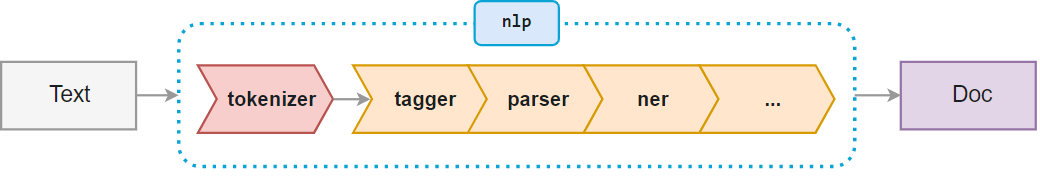

We can check to see what components currently live in the pipeline. In later sections we'll learn how to disable components and add new ones as needed.

In [4]:
nlp.pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x7cc3bba4fe80>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x7cc3bba4ffa0>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x7cc3bbb43df0>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x7cc3bbcdd880>),
 ('lemmatizer',
  <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x7cc3bbaa82c0>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x7cc3bb9b42e0>)]

In [5]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

___
## Tokenization
The first step in processing text is to split up all the component parts (words & punctuation) into "tokens". These tokens are annotated inside the Doc object to contain descriptive information. We'll go into much more detail on tokenization in an upcoming lecture. For now, let's look at another example:

In [7]:
doc2 = nlp(u"Tesla isn't looking into startups anymore.")

for token in doc2:
    print(token.text, token.pos_, token.dep_)

Tesla PROPN nsubj
is AUX aux
n't PART neg
looking VERB ROOT
into ADP prep
startups NOUN pobj
anymore ADV advmod
. PUNCT punct


Notice how `isn't` has been split into two tokens. spaCy recognizes both the root verb `is` and the negation attached to it. Notice also that both the extended whitespace and the period at the end of the sentence are assigned their own tokens.

It's important to note that even though `doc2` contains processed information about each token, it also retains the original text:

In [8]:
doc2

Tesla isn't looking into startups anymore.

In [9]:
doc[2]

looking

In [10]:
type(doc2)

spacy.tokens.doc.Doc

___
## Part-of-Speech Tagging (POS)
The next step after splitting the text up into tokens is to assign parts of speech. In the above example, `Tesla` was recognized to be a ***proper noun***. Here some statistical modeling is required. For example, words that follow "the" are typically nouns.

For a full list of POS Tags visit https://spacy.io/api/annotation#pos-tagging

In [11]:
doc2[0].pos_

'PROPN'

___
## Dependencies
We also looked at the syntactic dependencies assigned to each token. `Tesla` is identified as an `nsubj` or the ***nominal subject*** of the sentence.

For a full list of Syntactic Dependencies visit https://spacy.io/api/annotation#dependency-parsing
<br>A good explanation of typed dependencies can be found [here](https://nlp.stanford.edu/software/dependencies_manual.pdf)

In [12]:
doc[2].dep_

'ROOT'

In [13]:
doc[0].dep_

'nsubj'

In [14]:
spacy.explain('PROPN')

'proper noun'

In [15]:
spacy.explain('nsubj')

'nominal subject'

___
## Additional Token Attributes
We'll see these again in upcoming lectures. For now we just want to illustrate some of the other information that spaCy assigns to tokens:

|Tag|Description|doc2[0].tag|
|:------|:------:|:------|
|`.text`|The original word text<!-- .element: style="text-align:left;" -->|`Tesla`|
|`.lemma_`|The base form of the word|`tesla`|
|`.pos_`|The simple part-of-speech tag|`PROPN`/`proper noun`|
|`.tag_`|The detailed part-of-speech tag|`NNP`/`noun, proper singular`|
|`.shape_`|The word shape – capitalization, punctuation, digits|`Xxxxx`|
|`.is_alpha`|Is the token an alpha character?|`True`|
|`.is_stop`|Is the token part of a stop list, i.e. the most common words of the language?|`False`|

In [16]:
print(doc2[2].pos_)

PART


In [19]:
print(spacy.explain('PART'))

particle


In [21]:
print(doc2[2].tag_)

RB


In [22]:
print(spacy.explain('RB'))

adverb


In [23]:
print(doc2[4].tag_ + '/' + spacy.explain (doc2[4].tag_))

IN/conjunction, subordinating or preposition


In [28]:
print(doc2[0].text + ':' + doc2[0].shape_)

Tesla:Xxxxx


In [29]:
print(doc2[5].text + ':' + doc2[5].shape_)

startups:xxxx


In [24]:
#word shapes

In [26]:
print(doc2[0].is_alpha)

True


___
## Spans
Large Doc objects can be hard to work with at times. A **span** is a slice of Doc object in the form `Doc[start:stop]`.

In [30]:
doc3 = nlp(u'Although commmonly attributed to John Lennon from his song "Beautiful Boy", \
the phrase "Life is what happens to us while we are making other plans" was written by \
cartoonist Allen Saunders and published in Reader\'s Digest in 1957, when Lennon was 17.')

In [31]:
life_quote=doc3[16:30]

In [32]:
type(life_quote)

spacy.tokens.span.Span

In [33]:
life_quote

"Life is what happens to us while we are making other plans"

In upcoming chapters we'll see how to create Span objects using `Span()`. This will allow us to assign additional information to the Span.

___
## Sentences
Certain tokens inside a Doc object may also receive a "start of sentence" tag. While this doesn't immediately build a list of sentences, these tags enable the generation of sentence segments through `Doc.sents`. Later we'll write our own segmentation rules.

In [34]:
doc4 = nlp(u'This is the first sentence. This is another sentence. This is the last sentence.')

In [35]:
for sentence in doc4.sents:
  print(sentence)

This is the first sentence.
This is another sentence.
This is the last sentence.


In [40]:
for text in doc4:
  print(text)

This
is
the
first
sentence
.
This
is
another
sentence
.
This
is
the
last
sentence
.


In [39]:
for token in doc4:
  print(token.text)

This
is
the
first
sentence
.
This
is
another
sentence
.
This
is
the
last
sentence
.


In [41]:
doc4[6].is_sent_start

True

# Tokenization
The first step in creating a `Doc` object is to break down the incoming text into component pieces or "tokens".

In [42]:
# Import spaCy and load the language library
import spacy
nlp = spacy.load('en_core_web_sm')

In [43]:
# Create a string that includes opening and closing quotation marks
mystring = '"We\'re moving to L.A.!"'
print(mystring)

"We're moving to L.A.!"


In [44]:
doc=nlp(mystring)

In [45]:
for token in doc:
  print(token.text, end='|')

"|We|'re|moving|to|L.A.|!|"|

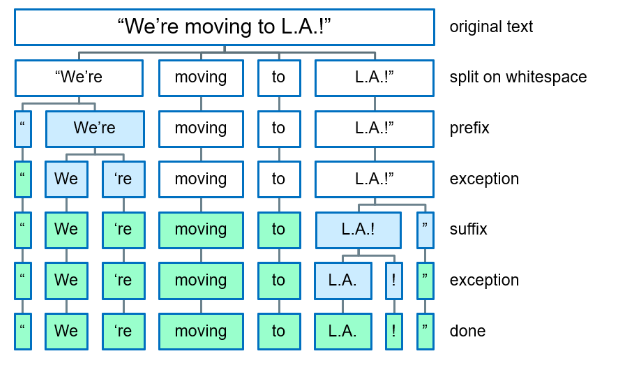

-  **Prefix**:	Character(s) at the beginning &#9656; `$ ( “ ¿`
-  **Suffix**:	Character(s) at the end &#9656; `km ) , . ! ”`
-  **Infix**:	Character(s) in between &#9656; `- -- / ...`
-  **Exception**: Special-case rule to split a string into several tokens or prevent a token from being split when punctuation rules are applied &#9656; `St. U.S.`

Notice that tokens are pieces of the original text. That is, we don't see any conversion to word stems or lemmas (base forms of words) and we haven't seen anything about organizations/places/money etc. Tokens are the basic building blocks of a Doc object - everything that helps us understand the meaning of the text is derived from tokens and their relationship to one another.

## Prefixes, Suffixes and Infixes
spaCy will isolate punctuation that does *not* form an integral part of a word. Quotation marks, commas, and punctuation at the end of a sentence will be assigned their own token. However, punctuation that exists as part of an email address, website or numerical value will be kept as part of the token.

In [46]:
doc2 = nlp(u"We're here to help! Send snail-mail, email support@oursite.com or visit us at http://www.oursite.com!")

for t in doc2:
    print(t)

We
're
here
to
help
!
Send
snail
-
mail
,
email
support@oursite.com
or
visit
us
at
http://www.oursite.com
!


In [47]:
doc3 = nlp(u'A 5km NYC cab ride costs $10.30')

for t in doc3:
    print(t)

A
5
km
NYC
cab
ride
costs
$
10.30


## Exceptions
Punctuation that exists as part of a known abbreviation will be kept as part of the token.

In [48]:
doc4 = nlp(u"Let's visit St. Louis in the U.S. next year.")

for t in doc4:
    print(t)

Let
's
visit
St.
Louis
in
the
U.S.
next
year
.


## Counting Tokens
`Doc` objects have a set number of tokens:

In [50]:
doc

"We're moving to L.A.!"

In [51]:
len(doc)

8

In [52]:
for t in doc:
  print(t)

"
We
're
moving
to
L.A.
!
"


## Counting Vocab Entries
`Vocab` objects contain a full library of items!

In [53]:
len(doc.vocab)

794

<font color=green>NOTE: This number changes based on the language library loaded at the start, and any new lexemes introduced to the `vocab` when the `Doc` was created.</font>

## Tokens can be retrieved by index position and slice
`Doc` objects can be thought of as lists of `token` objects. As such, individual tokens can be retrieved by index position, and spans of tokens can be retrieved through slicing:


In [54]:
doc5 = nlp(u'It is better to give than to receive.')

# Retrieve the third token:
doc5[2]

better

In [55]:
# Retrieve three tokens from the middle:
doc5[2:5]

better to give

In [56]:
# Retrieve the last four tokens:
doc5[-4:]

than to receive.

## Tokens cannot be reassigned
Although `Doc` objects can be considered lists of tokens, they do *not* support item reassignment:

In [57]:
doc6 = nlp(u'My dinner was horrible.')
doc7 = nlp(u'Your dinner was delicious.')

In [58]:
# Try to change "My dinner was horrible" to "My dinner was delicious"
doc6[3] = doc7[3]

TypeError: ignored

___
# Named Entities
Going a step beyond tokens, *named entities* add another layer of context. The language model recognizes that certain words are organizational names while others are locations, and still other combinations relate to money, dates, etc. Named entities are accessible through the `ents` property of a `Doc` object.

In [59]:
doc8= nlp(u'Apple to build a Hong Kong factory for $6 million')

In [66]:
for token in doc8:
  print(token.text, end='|')

print('\n...........')

for ent in doc8.ents:
  print(ent.text + '-- --' + 'ent.label'+ str(spacy.explain(ent.label_)))

Apple|to|build|a|Hong|Kong|factory|for|$|6|million|
...........
Apple-- --ent.labelCompanies, agencies, institutions, etc.
Hong Kong-- --ent.labelCountries, cities, states
$6 million-- --ent.labelMonetary values, including unit


In [67]:
len(doc8.ents)

3

Named Entity Recognition (NER) is an important machine learning tool applied to Natural Language Processing.<br>We'll do a lot more with it in an upcoming section. For more info on **named entities** visit https://spacy.io/usage/linguistic-features#named-entities

---
# Noun Chunks
Similar to `Doc.ents`, `Doc.noun_chunks` are another object property. *Noun chunks* are "base noun phrases" – flat phrases that have a noun as their head. You can think of noun chunks as a noun plus the words describing the noun – for example, in [Sheb Wooley's 1958 song](https://en.wikipedia.org/wiki/The_Purple_People_Eater), a *"one-eyed, one-horned, flying, purple people-eater"* would be one long noun chunk.

In [68]:
doc9 = nlp(u"Autonomous cars shift insurance liability toward manufacturers.")

In [69]:
for chunk in doc9.noun_chunks:
  print(chunk.text)

Autonomous cars
insurance liability
manufacturers


In [70]:
doc10 = nlp(u" Red cars do not carry higher insurance rates")

In [73]:
for chunk in doc10.noun_chunks:
  print(chunk.text)

 Red cars
higher insurance rates


In [74]:
doc11 = nlp(u"He was a one-eyed, one-horned, flying, purple people-eater.")

for chunk in doc11.noun_chunks:
    print(chunk.text)

He
a one-eyed, one-horned, flying, purple people-eater


We'll look at additional noun_chunks components besides `.text` in an upcoming section.<br>For more info on **noun_chunks** visit https://spacy.io/usage/linguistic-features#noun-chunks

___
# Built-in Visualizers

spaCy includes a built-in visualization tool called **displaCy**. displaCy is able to detect whether you're working in a Jupyter notebook, and will return markup that can be rendered in a cell right away. When you export your notebook, the visualizations will be included as HTML.

For more info visit https://spacy.io/usage/visualizers

## Visualizing the dependency parse
Run the cell below to import displacy and display the dependency graphic

In [76]:
from spacy import displacy

doc = nlp(u'Apple is going to build a U.K. factory for $6 million.')


displacy.render(doc, style='dep', jupyter=True, options={'distance': 110})

The optional `'distance'` argument sets the distance between tokens. If the distance is made too small, text that appears beneath short arrows may become too compressed to read.

## Visualizing the entity recognizer

In [79]:
doc = nlp(u'Over the last quarter Apple sold nearly 20 thousand iPods for a profit of $6 million.')
displacy.render(doc, style='ent', jupyter=True)

___
## Creating Visualizations Outside of Jupyter
If you're using another Python IDE or writing a script, you can choose to have spaCy serve up html separately:

In [80]:
doc = nlp(u'This is a sentence.')
displacy.serve(doc, style='dep')


Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


<font color=blue>**After running the cell above, click the link below to view the dependency parse**:</font>

http://127.0.0.1:5000
<br><br>
<font color=red>**To shut down the server and return to jupyter**, interrupt the kernel either through the **Kernel** menu above, by hitting the black square on the toolbar, or by typing the keyboard shortcut `Esc`, `I`, `I`</font>

Great! Now you should have an understanding of how tokenization divides text up into individual elements, how named entities provide context, and how certain tools help to visualize grammar rules and entity labels.
## Next up: Stemming

# Stemming
Often when searching text for a certain keyword, it helps if the search returns variations of the word. For instance, searching for "boat" might also return "boats" and "boating". Here, "boat" would be the **stem** for [boat, boater, boating, boats].

Stemming is a somewhat crude method for cataloging related words; it essentially chops off letters from the end until the stem is reached. This works fairly well in most cases, but unfortunately English has many exceptions where a more sophisticated process is required. In fact, spaCy doesn't include a stemmer, opting instead to rely entirely on lemmatization. For those interested, there's some background on this decision [here](https://github.com/explosion/spaCy/issues/327). We discuss the virtues of *lemmatization* in the next section.

Instead, we'll use another popular NLP tool called **nltk**, which stands for *Natural Language Toolkit*. For more information on nltk visit https://www.nltk.org/

## Porter Stemmer

One of the most common - and effective - stemming tools is [*Porter's Algorithm*](https://tartarus.org/martin/PorterStemmer/) developed by Martin Porter in [1980](https://tartarus.org/martin/PorterStemmer/def.txt). The algorithm employs five phases of word reduction, each with its own set of mapping rules. In the first phase, simple suffix mapping rules are defined, such as:

From a given set of stemming rules only one rule is applied, based on the longest suffix S1. Thus, `caresses` reduces to `caress` but not `cares`.

More sophisticated phases consider the length/complexity of the word before applying a rule. For example:

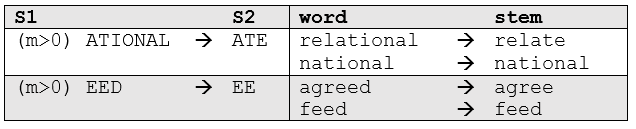

Here `m>0` describes the "measure" of the stem, such that the rule is applied to all but the most basic stems.

In [81]:
# Import the toolkit and the full Porter Stemmer library
import nltk

from nltk.stem.porter import *

In [82]:
p_stemmer = PorterStemmer()

In [83]:
words = ['run','runner','running','ran','runs','easily','fairly']

In [85]:
for word in words:
  print(word + " --------------> " + p_stemmer.stem(word))

run --------------> run
runner --------------> runner
running --------------> run
ran --------------> ran
runs --------------> run
easily --------------> easili
fairly --------------> fairli


<font color=green>Note how the stemmer recognizes "runner" as a noun, not a verb form or participle. Also, the adverbs "easily" and "fairly" are stemmed to the unusual root "easili" and "fairli"</font>
___

## Snowball Stemmer
This is somewhat of a misnomer, as Snowball is the name of a stemming language developed by Martin Porter. The algorithm used here is more acurately called the "English Stemmer" or "Porter2 Stemmer". It offers a slight improvement over the original Porter stemmer, both in logic and speed. Since **nltk** uses the name SnowballStemmer, we'll use it here.

In [86]:
from nltk.stem.snowball import SnowballStemmer

# The Snowball Stemmer requires that you pass a language parameter
s_stemmer = SnowballStemmer(language='english')

In [87]:
words = ['run','runner','running','ran','runs','easily','fairly']
# words = ['generous','generation','generously','generate']

In [88]:
for word in words:
    print(word+' --> '+s_stemmer.stem(word))

run --> run
runner --> runner
running --> run
ran --> ran
runs --> run
easily --> easili
fairly --> fair


<font color=green>In this case the stemmer performed the same as the Porter Stemmer, with the exception that it handled the stem of "fairly" more appropriately with "fair"</font>

## Try it yourself!
#### Pass in some of your own words and test each stemmer on them. Remember to pass them as strings!

In [89]:
words = ['consolingly']

In [94]:
print('PORTER STEMMER:' )
for word in words:
  print(word + " ----------> " + p_stemmer.stem(word))

PORTER STEMMER:
consolingly ----------> consolingli


In [96]:
print('Porter2 Stemmer : ')
for word in words:
  print(word + " ----------> "+ s_stemmer.stem(word))

Porter2 Stemmer : 
consolingly ----------> consol


Stemming has its drawbacks. If given the token `saw`, stemming might always return `saw`, whereas lemmatization would likely return either `see` or `saw` depending on whether the use of the token was as a verb or a noun. As an example, consider the following:

In [101]:
phrase = 'I am meeting him tomorrow at the meeting'

for word in phrase.split():
    print(word+' --> '+p_stemmer.stem(word))

I --> i
am --> am
meeting --> meet
him --> him
tomorrow --> tomorrow
at --> at
the --> the
meeting --> meet


### Next up: Lemmatization

# Lemmatization
In contrast to stemming, lemmatization looks beyond word reduction, and considers a language's full vocabulary to apply a *morphological analysis* to words. The lemma of 'was' is 'be' and the lemma of 'mice' is 'mouse'. Further, the lemma of 'meeting' might be 'meet' or 'meeting' depending on its use in a sentence.

In [102]:
# Perform standard imports:
import spacy
nlp = spacy.load('en_core_web_sm')

In [103]:
doc1 = nlp(u"I am a runner running in a race because I love to run since I ran today")

for token in doc1:
    print(token.text, '\t', token.pos_, '\t', token.lemma, '\t', token.lemma_)

I 	 PRON 	 4690420944186131903 	 I
am 	 AUX 	 10382539506755952630 	 be
a 	 DET 	 11901859001352538922 	 a
runner 	 NOUN 	 12640964157389618806 	 runner
running 	 VERB 	 12767647472892411841 	 run
in 	 ADP 	 3002984154512732771 	 in
a 	 DET 	 11901859001352538922 	 a
race 	 NOUN 	 8048469955494714898 	 race
because 	 SCONJ 	 16950148841647037698 	 because
I 	 PRON 	 4690420944186131903 	 I
love 	 VERB 	 3702023516439754181 	 love
to 	 PART 	 3791531372978436496 	 to
run 	 VERB 	 12767647472892411841 	 run
since 	 SCONJ 	 10066841407251338481 	 since
I 	 PRON 	 4690420944186131903 	 I
ran 	 VERB 	 12767647472892411841 	 run
today 	 NOUN 	 11042482332948150395 	 today


<font color=green>In the above sentence, `running`, `run` and `ran` all point to the same lemma `run` (...11841) to avoid duplication.</font>

### Function to display lemmas
Since the display above is staggared and hard to read, let's write a function that displays the information we want more neatly.

In [105]:
def show_lemmas(text):
  for token in text:
    print(f'{token.text:{10}} {token.pos_:{6}} {token.lemma:<{22}} {token.lemma_}')

Here we're using an **f-string** to format the printed text by setting minimum field widths and adding a left-align to the lemma hash value.

In [106]:
doc2 = nlp(u"I saw eighteen mice today!")

show_lemmas(doc2)

I          PRON   4690420944186131903    I
saw        VERB   11925638236994514241   see
eighteen   NUM    9609336664675087640    eighteen
mice       NOUN   1384165645700560590    mouse
today      NOUN   11042482332948150395   today
!          PUNCT  17494803046312582752   !


<font color=green>Notice that the lemma of `saw` is `see`, `mice` is the plural form of `mouse`, and yet `eighteen` is its own number, *not* an expanded form of `eight`.</font>

In [107]:
doc3 = nlp(u"I am meeting him tomorrow at the meeting.")

show_lemmas(doc3)

I          PRON   4690420944186131903    I
am         AUX    10382539506755952630   be
meeting    VERB   6880656908171229526    meet
him        PRON   1655312771067108281    he
tomorrow   NOUN   3573583789758258062    tomorrow
at         ADP    11667289587015813222   at
the        DET    7425985699627899538    the
meeting    NOUN   14798207169164081740   meeting
.          PUNCT  12646065887601541794   .


<font color=green>Here the lemma of `meeting` is determined by its Part of Speech tag.</font>

In [108]:
doc4 = nlp(u"That's an enormous automobile")

show_lemmas(doc4)

That       PRON   4380130941430378203    that
's         AUX    10382539506755952630   be
an         DET    15099054000809333061   an
enormous   ADJ    17917224542039855524   enormous
automobile NOUN   7211811266693931283    automobile


<font color=green>Note that lemmatization does *not* reduce words to their most basic synonym - that is, `enormous` doesn't become `big` and `automobile` doesn't become `car`.</font>

We should point out that although lemmatization looks at surrounding text to determine a given word's part of speech, it does not categorize phrases. In an upcoming lecture we'll investigate *word vectors and similarity*.

## Next up: Stop Words

# Stop Words
Words like "a" and "the" appear so frequently that they don't require tagging as thoroughly as nouns, verbs and modifiers. We call these *stop words*, and they can be filtered from the text to be processed. spaCy holds a built-in list of some 305 English stop words.

In [109]:
# Perform standard imports:
import spacy
nlp = spacy.load('en_core_web_sm')

In [110]:
# Print the set of spaCy's default stop words (remember that sets are unordered):
print(nlp.Defaults.stop_words)

{'below', 'have', 'herein', 'after', 'enough', 'own', 'only', 'in', 'less', 'we', 'under', 'whence', 'nine', 'once', 'those', 'one', 'both', 'when', 'using', 'behind', 'but', 'being', 'afterwards', 'seemed', 'so', 'did', 'please', 'six', 'otherwise', 'no', 'which', 'become', 'since', 'down', 'yourself', 'whom', 'am', 'an', 'perhaps', 'full', 'beyond', 'my', "'ve", 'some', 'has', 'do', 'whereas', 'because', 'everyone', 'hers', 'something', 'up', 'hereupon', "'s", '‘ve', '’re', 'somewhere', 'hence', 'name', 'though', 'every', 'third', 'where', 'ca', 'his', 'former', 'herself', 'anyone', 'four', 'most', 'rather', 'why', 'myself', 'further', 'due', 'itself', 'any', 'almost', '’m', 'via', 'as', 'hundred', 'sixty', 'sometime', 'used', 'although', 'somehow', 'besides', 'always', 'can', 'through', 'seeming', 'top', 'had', 'thence', 'make', 'onto', '‘s', 'toward', 'bottom', 'other', 'thus', 'yours', '‘d', 'moreover', 'ten', 'front', 'least', 'either', 'well', 'fifty', 'say', 'whoever', 'yoursel

In [111]:
len(nlp.Defaults.stop_words)

326

## To see if a word is a stop word

In [112]:
nlp.vocab['myself'].is_stop

True

In [113]:
nlp.vocab['mystery'].is_stop

False

## To add a stop word
There may be times when you wish to add a stop word to the default set. Perhaps you decide that `'btw'` (common shorthand for "by the way") should be considered a stop word.

In [114]:
nlp.Defaults.stop_words.add('btw')

In [115]:
# Set the stop_word tag on the lexeme
nlp.vocab['btw'].is_stop = True

In [116]:
len(nlp.Defaults.stop_words)

327

In [117]:
nlp.vocab['btw'].is_stop

True

## To remove a stop word
Alternatively, you may decide that `'beyond'` should not be considered a stop word.

In [119]:
# Remove the word from the set of stop words
nlp.Defaults.stop_words.remove('beyond')

# Remove the stop_word tag from the lexeme
nlp.vocab['beyond'].is_stop = False


KeyError: ignored

In [120]:
len(nlp.Defaults.stop_words)

326

In [121]:
nlp.vocab['beyond'].is_stop

False

Great! Now you should be able to access spaCy's default set of stop words, and add or remove stop words as needed.
## Next up: Vocabulary and Matching

# Vocabulary and Matching
So far we've seen how a body of text is divided into tokens, and how individual tokens are parsed and tagged with parts of speech, dependencies and lemmas.

In this section we will identify and label specific phrases that match patterns we can define ourselves.

## Rule-based Matching
spaCy offers a rule-matching tool called `Matcher` that allows you to build a library of token patterns, then match those patterns against a Doc object to return a list of found matches. You can match on any part of the token including text and annotations, and you can add multiple patterns to the same matcher.

In [122]:
# Perform standard imports
import spacy
nlp = spacy.load('en_core_web_sm')

In [192]:
# Import the Matcher library
from spacy.matcher import Matcher
matcher = Matcher (nlp.vocab)

<font color=green>Here `matcher` is an object that pairs to the current `Vocab` object. We can add and remove specific named matchers to `matcher` as needed.</font>

### Creating patterns
In literature, the phrase 'solar power' might appear as one word or two, with or without a hyphen. In this section we'll develop a matcher named 'SolarPower' that finds all three:

In [193]:
pattern1=[{'LOWER' : 'solarpower'}]

In [194]:
pattern2=[{'LOWER': 'solar'}, {'LOWER': 'power'}]

In [195]:
pattern3 = [{'LOWER': 'solar'}, {'IS_PUNCT': True}, {'LOWER': 'power'}]

In [202]:
matcher.add('SolarPower', [pattern1, pattern2, pattern3])

Let's break this down:
* `pattern1` looks for a single token whose lowercase text reads 'solarpower'
* `pattern2` looks for two adjacent tokens that read 'solar' and 'power' in that order
* `pattern3` looks for three adjacent tokens, with a middle token that can be any punctuation.<font color=green>*</font>

<font color=green>\* Remember that single spaces are not tokenized, so they don't count as punctuation.</font>
<br>Once we define our patterns, we pass them into `matcher` with the name 'SolarPower', and set *callbacks* to `None` (more on callbacks later).

### Applying the matcher to a Doc object

In [203]:
doc = nlp(u'The Solar Power industry continues to grow as demand \ for solarpower increases. Solar-power cars are gaining popularity.')

In [204]:
found_matches = matcher(doc)
print(found_matches)

[(15884727606302759643, 1, 3), (8656102463236116519, 1, 3), (15884727606302759643, 11, 12), (8656102463236116519, 11, 12), (15884727606302759643, 14, 17), (8656102463236116519, 14, 17)]


`matcher` returns a list of tuples. Each tuple contains an ID for the match, with start & end tokens that map to the span `doc[start:end]`

In [205]:
for match_id,start,end in found_matches:
  string_id = nlp.vocab.strings[match_id]
  span=doc[start:end]
  print(match_id,string_id,start,end,span.text)

15884727606302759643 solarPower 1 3 Solar Power
8656102463236116519 SolarPower 1 3 Solar Power
15884727606302759643 solarPower 11 12 solarpower
8656102463236116519 SolarPower 11 12 solarpower
15884727606302759643 solarPower 14 17 Solar-power
8656102463236116519 SolarPower 14 17 Solar-power


The `match_id` is simply the hash value of the `string_ID` 'SolarPower'

### Setting pattern options and quantifiers
You can make token rules optional by passing an `'OP':'*'` argument. This lets us streamline our patterns list:

In [206]:
# Redefine the patterns:
pattern1 = [{'LOWER': 'solarpower'}]
pattern2 = [{'LOWER': 'solar'}, {'IS_PUNCT': True, 'OP':'*'}, {'LOWER': 'power'}]

In [207]:
# Remove the old patterns to avoid duplication:
matcher.remove('SolarPower')


In [147]:
# Add the new set of patterns to the 'SolarPower' matcher:
matcher.add('SolarPower', [pattern1, pattern2])

In [148]:
found_matches = matcher(doc)
print(found_matches)

[(8656102463236116519, 1, 3), (8656102463236116519, 11, 12), (8656102463236116519, 14, 17)]


This found both two-word patterns, with and without the hyphen!

The following quantifiers can be passed to the `'OP'` key:
<table><tr><th>OP</th><th>Description</th></tr>

<tr ><td><span >\!</span></td><td>Negate the pattern, by requiring it to match exactly 0 times</td></tr>
<tr ><td><span >?</span></td><td>Make the pattern optional, by allowing it to match 0 or 1 times</td></tr>
<tr ><td><span >\+</span></td><td>Require the pattern to match 1 or more times</td></tr>
<tr ><td><span >\*</span></td><td>Allow the pattern to match zero or more times</td></tr>
</table>


### Be careful with lemmas!
If we wanted to match on both 'solar power' and 'solar powered', it might be tempting to look for the *lemma* of 'powered' and expect it to be 'power'. This is not always the case! The lemma of the *adjective* 'powered' is still 'powered':

In [156]:
pattern1 = [{'LOWER': 'solarpower'}]
pattern2 = [{'LOWER': 'solar'}, {'IS_PUNCT': True, 'OP':'*'}, {'LEMMA': 'power'}] # CHANGE THIS PATTERN



In [160]:
# Remove the old patterns to avoid duplication:
matcher.remove('SolarPower')

In [161]:
# Add the new set of patterns to the 'SolarPower' matcher:
matcher.add('SolarPower', [pattern1, pattern2])

In [162]:
doc2 = nlp(u'Solar-powered energy runs solar-powered cars.')

In [163]:
found_matches = matcher(doc2)

In [164]:
print(found_matches)

[(8656102463236116519, 0, 3), (8656102463236116519, 5, 8)]


<font color=green>The matcher found the first occurrence because the lemmatizer treated 'Solar-powered' as a verb, but not the second as it considered it an adjective.<br>For this case it may be better to set explicit token patterns.</font>

In [208]:
# Remove the old patterns to avoid duplication:
matcher.remove('SolarPower')

ValueError: ignored

In [169]:
pattern1 = [{'LOWER': 'solarpower'}]
pattern2 = [{'LOWER': 'solar'}, {'IS_PUNCT': True, 'OP':'*'}, {'LOWER': 'power'}]
pattern3 = [{'LOWER': 'solarpowered'}]
pattern4 = [{'LOWER': 'solar'}, {'IS_PUNCT': True, 'OP':'*'}, {'LOWER': 'powered'}]



# Add the new set of patterns to the 'SolarPower' matcher:
matcher.add('SolarPower', [ pattern1, pattern2, pattern3, pattern4])

In [170]:
found_matches = matcher(doc2)
print(found_matches)

[(8656102463236116519, 0, 3), (8656102463236116519, 5, 8)]


## Other token attributes
Besides lemmas, there are a variety of token attributes we can use to determine matching rules:
<table><tr><th>Attribute</th><th>Description</th></tr>

<tr ><td><span >`ORTH`</span></td><td>The exact verbatim text of a token</td></tr>
<tr ><td><span >`LOWER`</span></td><td>The lowercase form of the token text</td></tr>
<tr ><td><span >`LENGTH`</span></td><td>The length of the token text</td></tr>
<tr ><td><span >`IS_ALPHA`, `IS_ASCII`, `IS_DIGIT`</span></td><td>Token text consists of alphanumeric characters, ASCII characters, digits</td></tr>
<tr ><td><span >`IS_LOWER`, `IS_UPPER`, `IS_TITLE`</span></td><td>Token text is in lowercase, uppercase, titlecase</td></tr>
<tr ><td><span >`IS_PUNCT`, `IS_SPACE`, `IS_STOP`</span></td><td>Token is punctuation, whitespace, stop word</td></tr>
<tr ><td><span >`LIKE_NUM`, `LIKE_URL`, `LIKE_EMAIL`</span></td><td>Token text resembles a number, URL, email</td></tr>
<tr ><td><span >`POS`, `TAG`, `DEP`, `LEMMA`, `SHAPE`</span></td><td>The token's simple and extended part-of-speech tag, dependency label, lemma, shape</td></tr>
<tr ><td><span >`ENT_TYPE`</span></td><td>The token's entity label</td></tr>

</table>

### Token wildcard
You can pass an empty dictionary `{}` as a wildcard to represent **any token**. For example, you might want to retrieve hashtags without knowing what might follow the `#` character:
>`[{'ORTH': '#'}, {}]`

___
## PhraseMatcher
In the above section we used token patterns to perform rule-based matching. An alternative - and often more efficient - method is to match on terminology lists. In this case we use PhraseMatcher to create a Doc object from a list of phrases, and pass that into `matcher` instead.

In [171]:
# Perform standard imports, reset nlp
import spacy
nlp = spacy.load('en_core_web_sm')

In [209]:
# Import the PhraseMatcher library
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(nlp.vocab)

For this exercise we're going to import a Wikipedia article on *Reaganomics*<br>
Source: https://en.wikipedia.org/wiki/Reaganomics

In [178]:
with open('reaganomics.txt', encoding='utf-8', errors='replace') as f:
    doc3 = nlp(f.read())


In [179]:
# First, create a list of match phrases:
phrase_list = ['voodoo economics', 'supply-side economics', 'trickle-down economics', 'free-market economics']

In [210]:
# Next, convert each phrase to a Doc object:
phrase_patterns = [nlp(text) for text in phrase_list]

In [211]:
# Pass each Doc object into matcher (note the use of the asterisk!):
matcher.add('VoodooEconomics', None, *phrase_patterns)

In [212]:
# Build a list of matches:
matches = matcher(doc3)

In [213]:
# (match_id, start, end)
matches

[(3473369816841043438, 41, 45),
 (3473369816841043438, 49, 53),
 (3473369816841043438, 54, 56),
 (3473369816841043438, 61, 65),
 (3473369816841043438, 673, 677),
 (3473369816841043438, 2990, 2994)]

In [222]:
for match_id, start,  end in  matches:
  string_id = nlp.vocab.strings[match_id]
  span=doc3[start - 5 :end + 5]
  print(match_id, string_id, start,end,span.text)

3473369816841043438 VoodooEconomics 41 45 policies are commonly associated with supply-side economics, referred to as trickle
3473369816841043438 VoodooEconomics 49 53 economics, referred to as trickle-down economics or voodoo economics by political
3473369816841043438 VoodooEconomics 54 56 trickle-down economics or voodoo economics by political opponents, and
3473369816841043438 VoodooEconomics 61 65 by political opponents, and free-market economics by political advocates.


3473369816841043438 VoodooEconomics 673 677 attracted a following from the supply-side economics movement, which formed in
3473369816841043438 VoodooEconomics 2990 2994 became widely known as "trickle-down economics", due to the


In [216]:
doc3[:70]

REAGANOMICS
https://en.wikipedia.org/wiki/Reaganomics

Reaganomics (a portmanteau of [Ronald] Reagan and economics attributed to Paul Harvey)[1] refers to the economic policies promoted by U.S. President Ronald Reagan during the 1980s. These policies are commonly associated with supply-side economics, referred to as trickle-down economics or voodoo economics by political opponents, and free-market economics by political advocates.


## Viewing Matches
There are a few ways to fetch the text surrounding a match. The simplest is to grab a slice of tokens from the doc that is wider than the match:

In [217]:
doc3[673:677]  # Note that the fifth match starts at doc3[673]

supply-side economics

In [218]:
doc3[2990:2994]  # The sixth match starts at doc3[2985]

trickle-down economics

In [219]:
# Build a list of sentences
sents = [sent for sent in doc3.sents]

# In the next section we'll see that sentences contain start and end token values:
print(sents[0].start, sents[0].end)

0 35


In [220]:
# Iterate over the sentence list until the sentence end value exceeds a match start value:
for sent in sents:
    if matches[4][1] < sent.end:  # this is the fifth match, that starts at doc3[673]
        print(sent)
        break

At the same time he attracted a following from the supply-side economics movement, which formed in opposition to Keynesian demand-stimulus economics.


For additional information visit https://spacy.io/usage/linguistic-features#section-rule-based-matching
## Next Up: NLP Basics Assessment

# NLP Basics Assessment

For this assessment we'll be using the short story [_An Occurrence at Owl Creek Bridge_](https://en.wikipedia.org/wiki/An_Occurrence_at_Owl_Creek_Bridge) by Ambrose Bierce (1890). <br>The story is in the public domain; the text file was obtained from [Project Gutenberg](https://www.gutenberg.org/ebooks/375.txt.utf-8).

In [224]:
import spacy
nlp=spacy.load('en_core_web_sm')

**1. Create a Doc object from the file `owlcreek.txt`**<br>
> HINT: Use `with open('../TextFiles/owlcreek.txt') as f:`

In [237]:
with open('owlcreek.txt') as f:
    doc=nlp(f.read())

In [239]:
len(doc)

4835

In [238]:
doc[:36]

AN OCCURRENCE AT OWL CREEK BRIDGE

by Ambrose Bierce

I

A man stood upon a railroad bridge in northern Alabama, looking down
into the swift water twenty feet below.  

**2. How many tokens are contained in the file?**

In [232]:
len(doc)

4835

**3. How many sentences are contained in the file?**<br>HINT: You'll want to build a list first!

In [241]:
doc_sentences = [sent for sent in doc.sents]

In [242]:
len(doc_sentences)

204

In [248]:
print(doc_sentences[1].text)

The man's hands were behind
his back, the wrists bound with a cord.  


In [252]:
#normal solution
for token in doc_sentences[1]:
  print(f'{token.text:{10}} {token.pos_:{10}}{token.text:{10}} {token.dep_:{10}} {token.lemma:{10}}')

The        DET       The        det        7425985699627899538
man        NOUN      man        poss       3104811030673030468
's         PART      's         case       16428057658620181782
hands      NOUN      hands      nsubj      10690717480206833971
were       AUX       were       ROOT       10382539506755952630
behind     ADP       behind     prep       9368086581607646285

          SPACE     
          dep        962983613142996970
his        PRON      his        poss       2661093235354845946
back       NOUN      back       pobj       15255859468896132977
,          PUNCT     ,          punct      2593208677638477497
the        DET       the        det        7425985699627899538
wrists     NOUN      wrists     appos      40049004327531306
bound      VERB      bound      acl        16578919470474021089
with       ADP       with       prep       12510949447758279278
a          DET       a          det        11901859001352538922
cord       NOUN      cord       pobj       89782298

**6. Write a matcher called 'Swimming' that finds both occurrences of the phrase "swimming vigorously" in the text**<br>
HINT: You should include an `'IS_SPACE': True` pattern between the two words!

In [271]:
# Import the Matcher library:
from spacy.matcher import matcher
matcher = Matcher (nlp.vocab)

In [256]:
#create a pattern and add it to matcher
pattern1 = [{'LOWER': 'swimming'}, {'IS_SPACE': True, 'OP':'*'}, {'LOWER': 'vigorously'}]
matcher.add('swimming',[pattern1])

In [264]:
found_matches=matcher(doc)

In [272]:
print(found_matches) # Create a list of matches called "found_matches" and print the list:

[(12526975369366237900, 1274, 1277), (12526975369366237900, 3609, 3612)]


**7. Print the text surrounding each found match**

In [266]:
#create a lis of called "found matches and print the list"

def surrounding(doc,start,end):
  print(doc[start-10:end+5])

In [267]:
surrounding(doc,1274,1277)

 By diving I could evade the bullets and, swimming
vigorously, reach the bank,


In [268]:
surrounding(doc,3609,3612)

saw all this over his shoulder; he was now swimming
vigorously with the current.  


**EXTRA CREDIT:<br>Print the *sentence* that contains each found match**

In [269]:
for sentence in doc_sentences:
  if found_matches[1][1] < sentence.end:
    print(sentence)
    break


The hunted man saw all this over his shoulder; he was now swimming
vigorously with the current.  


In [270]:
for sentence in doc_sentences:
  if found_matches[0][1] < sentence.end:
    print(sentence)
    break

By diving I could evade the bullets and, swimming
vigorously, reach the bank, take to the woods and get away home.  
